# Question

Given these home prices find out prices of homes whose area is:
    1] 3300 square feet,
    2] 5000 square feet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Reading csv file using pandas

df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


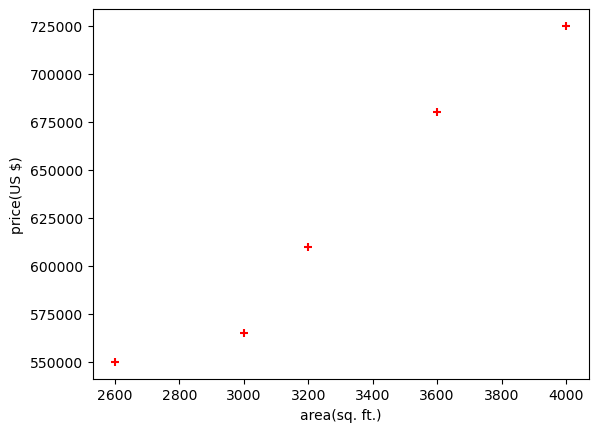

In [6]:
# "Matplotlib inline" allows us to interact with our plots directly in the notebook or shell output, such as zooming, panning, 
# and saving.
%matplotlib inline

# Plotting Scatter Plot
plt.xlabel("area(sq. ft.)")
plt.ylabel("price(US $)")
plt.scatter(df.area, df.price, color='red', marker='+')

In [9]:
# Creating a linear regression object
reg = linear_model.LinearRegression()

# Fitting the data means training the linear regression model
reg.fit(df[['area']], df.price)

LinearRegression()

In [11]:
reg.predict([[3300]])

C:\Users\JD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [12]:
reg.coef_

array([135.78767123])

In [13]:
reg.intercept_

180616.43835616432

In [14]:
# y = mx + c

y = reg.coef_ * 3300 + reg.intercept_
print(y)

[628715.75342466]


In [15]:
reg.predict([[5000]])

C:\Users\JD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [17]:
d = pd.read_csv("areas.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [18]:
# Predicting prices for multiple areas
p = reg.predict(d)

In [19]:
# Writing prices into areas.csv
d['prices'] = p

In [20]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [21]:
# Exporting prediction to new csv file
d.to_csv("prediction.csv", index=False)

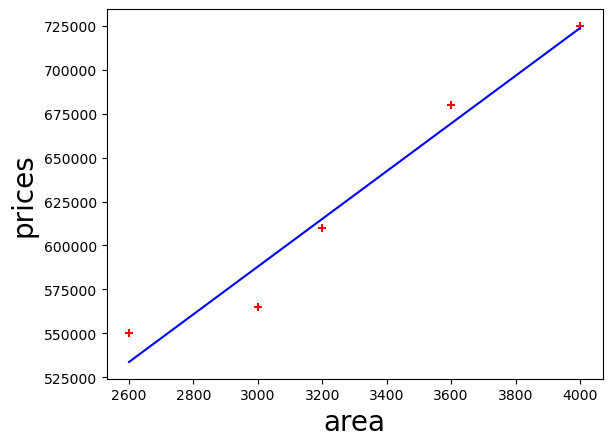

In [23]:
# Visual representation of linear regression
%matplotlib inline

plt.xlabel('area', fontsize=20)
plt.ylabel('prices', fontsize=20)

plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]), color='blue')